### CSE144 Spring 2021 Homework 2

In [317]:
import numpy as np
import pandas as pd
import math as math
from matplotlib import pyplot as plt

This homework consists of four questions: 
* Q1: basis function
* Q2: regularization
* Q3: linear classificaiton
* Q4: logistic regression

You are given a few helper functions (from exercise) that you can use for finishing the homework. These functions are listed below. 

When you are done with the notebook, save the `.ipynb` file as well as a `.pdf` file of the same notebook and submit on canvas. 

In [318]:
# Helper functions from exercise. for full documentation on the functions, please refer to exercise 1. 

def computeCost(X, y, theta):
    """
    Compute cost for linear regression.
    @param X : The input dataset, shape (m, n+1)
    @param y : The function value (label), shape (m, )
    @param theta : The parameters for the regression function. shape (n+1, ).
    @return J : The cost.
    """
    m = y.size
    J = (np.sum((X @ theta - y)**2))/2/m
    return J

def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`
    
    @param X : The input dataset, shape (m, n+1)
    @param y : The function value (label), shape (m, )
    @param theta : The parameters for the regression function. shape (n+1, ).
    @param alpha: Learning rate. 
    @param num_iters: The number of iterations for gradient descent.
    
    @return theta: The learned linear regression parameters. A vector of shape (n+1, ).
    @return J_history: A python list for the values of the cost function after each iteration.
    """
    m = y.shape[0] 
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta_tmp = []    
        for j in range(len(theta)): # partial derivative 
            gradient = (alpha/m) * np.sum(((X @ theta) - y) * X[:,j])
            new_theta = theta[j] - gradient
            theta_tmp.append(new_theta)        
        theta = theta_tmp
        J_history.append(computeCost(X, y, theta))
    return theta, J_history

## Question 1: Basis Function
We can use linear regression to fit non-linear data through using basis function. In this homework question, a non-linear data is generated from this function:

$$
y = x + x^2 - 1.7x^3
$$

You are given the data X and y, and you are expected to do the following: 
1. Define a basis funciton that will transform any data X to n-degree polynomial. 

2. Define a `linear_regression` function, that performs gradient descent to learn parameter theta given data using linear regression. 

3. Transform the X with **1st degree**, **2nd degree** and **3rd degree** polynomial basis function, and fit a linear regression function the transformed data. 

You should use the `computeCost` and `gradientDescent` function provided to you to perform the linear regression. You will plot the original data along with the learnt function. The plotting function is provided to you. 

Text(0, 0.5, 'y')

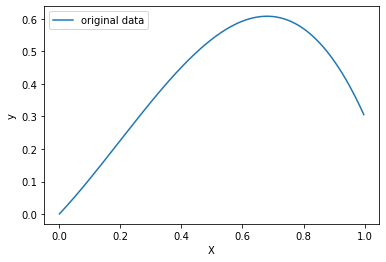

In [319]:
### Here are the data X, and y plotted

m = 1000 # number of samples
X = np.sort(np.random.uniform(low=0, high=1, size=m))
y = X + X**2 - 1.7*X**3

plt.plot(X, y, label="original data")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")

### Q1.1. Define a basis funciton that will transform any data X to n-degree polynomial.
> hint: a n-th degree polynomial transformation of X looks like $[X^0, X^1, X^2, ... X^n]$, where $X^0=1$ is the bias

In [320]:
def basis_function(X, n_degree=1):
    """
    @param X: the input data X, of shape (m, ), where m is the number of samples
    @param n_degree: the n-th degree polynomial, where n_degree can be any integer >= 1  
    @return new_X: X transformed to n-th degree polynomial, of shape (m, n_degree + 1)
    """
    ##### beginning of your code #######
    if(n_degree < 0):
        return NULL;
    #append n columns then for each column, take the value of the previous column and multiply it by the value of x[1]
    #print(new_X)
    new_X = np.zeros((X.shape[0], n_degree+1))
    for i in range(X.shape[0]):
        new_X[i][0] = 1
    if(n_degree == 0):
        return new_X
    for i in range(X.shape[0]):
        new_X[i][1] = X[i]
    for i in range(X.shape[0]):
        for j in range(2,n_degree+1):
            new_X[i][j] = new_X[i][1]*new_X[i][j-1]
    #print(zeros)
    #new_X = np.hstack((new_X, zeros))
    #print(new_X)
    ####### end of your code ########
    
    return new_X

newest_X = basis_function(X, 4)

### Q1.2. Define a `linear_regression` function, that performs gradient descent to learn parameter theta given data

**Suggested Steps**
> 1. initialize theta to be of shape (n_feature,),where n_feature is the same as the 2nd dimension of data X
> 2. call `gradientDescent` to update the theta
> 3. return `theta` and `J_history`

In [321]:
def linear_regression(X, y, iterations=1000, alpha=0.001):
    """
    @params X: the input data X, of shape (m, n), where m is the number of samples, and n is the number of features
    @params y: the data label y, of shape (m, ). 
    @params iterations: number of iterations in gradient descent
    @params alpha: learning rate of gradient descent
    
    @return theta: updated paramter theta
    @return J_history: history of cost through out each iteration. 
    """ 
    ##### beginning of your code #######
    theta = np.zeros(X.shape[1])
    theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
    ####### end of your code ########
    return theta, J_history
linear_regression(newest_X, y)

([0.20812421846019757,
  0.1285316906813902,
  0.08408792534572566,
  0.05873177465017168,
  0.043094242370561385],
 [0.10073799257813,
  0.10045638333391908,
  0.10017565673796713,
  0.09989581002053798,
  0.09961684042058715,
  0.09933874518573473,
  0.09906152157223806,
  0.09878516684496476,
  0.09850967827736562,
  0.09823505315144769,
  0.09796128875774739,
  0.09768838239530385,
  0.09741633137163208,
  0.09714513300269649,
  0.09687478461288437,
  0.09660528353497934,
  0.09633662711013512,
  0.09606881268784923,
  0.09580183762593683,
  0.09553569929050452,
  0.09527039505592445,
  0.09500592230480828,
  0.09474227842798141,
  0.09447946082445713,
  0.09421746690141093,
  0.09395629407415496,
  0.0936959397661124,
  0.09343640140879211,
  0.09317767644176314,
  0.09291976231262952,
  0.09266265647700501,
  0.09240635639848799,
  0.09215085954863637,
  0.09189616340694264,
  0.09164226546080893,
  0.09138916320552229,
  0.09113685414422977,
  0.09088533578791395,
  0.0906346056

### Q1.3. Combine 1.1 and 1.2: Use 1st, 2nd, and 3nd degree basis function on X, and perform linear regression on the new transformed data. 

**Suggested Steps**
> 1. Call `basis_function` with varying number of n_degree to transform `X` to `new_X`
> 2. Call `linear_regression` with `new_X` and `y` to learn the theta
> 3. Return `theta` and `J_history`
> 4. Plot the learnt model and learning curve the the `plot_model` function that's given to you below

Notice that you probably need to tune the learning rate `alpha` and `iterations` parameter in order to get a good result. Experiment with different numbers until you get a reasonable outcome.  Feel free to try out additional number of polynomials and see the outcome. 

In [322]:
def plot_model(X, y, theta, J_history, n_degree):
    new_X = basis_function(X, n_degree=n_degree)
    y_pred = np.dot(new_X, np.array(theta))
    print(theta)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
    ax1.scatter(X, y, label="data", s=1)
    ax1.set_xlabel("X")
    ax1.set_ylabel("y")
    ax1.plot(X, y_pred, label="learnt model", c="red")
    ax1.set_title("{}th degree polynomial basis function".format(n_degree))
    ax1.legend()
    
    ax2.plot(range(len(J_history)), J_history, c="black")
    ax2.set_xlabel("num iterations")
    ax2.set_ylabel("Cost")
    ax2.set_title("Learning curve")
    ax2.grid()

[0.2546326001451728, 0.3217811598026803]


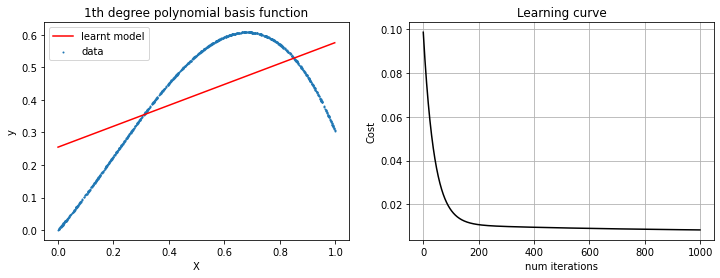

In [323]:
n_degree = 1

########## beginning of your code #################
new_X = basis_function(X, 1)
theta, J_history = linear_regression(new_X,y, 1000, .01)
#print(theta)
#print(J_history)
######### end of your code ########################

plot_model(X, y, theta, J_history, n_degree)

[-0.060618672443960464, 1.8912237271435934, -1.426513351449921]


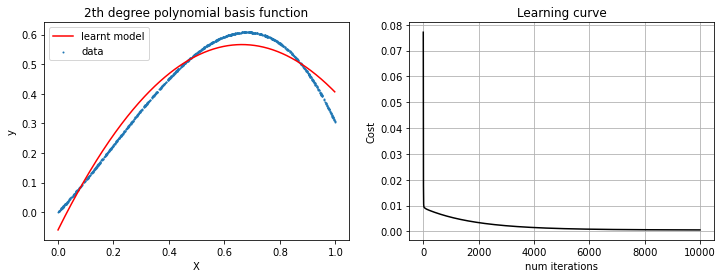

In [324]:
n_degree = 2

########## beginning of your code #################

new_X = basis_function(X, 2)
theta, J_history = linear_regression(new_X,y, 10000, .1)
######### end of your code ########################

plot_model(X, y, theta, J_history, n_degree)

[-0.03378273937547899, 1.3948020960440992, 0.03802275117885446, -1.0702821835138223]


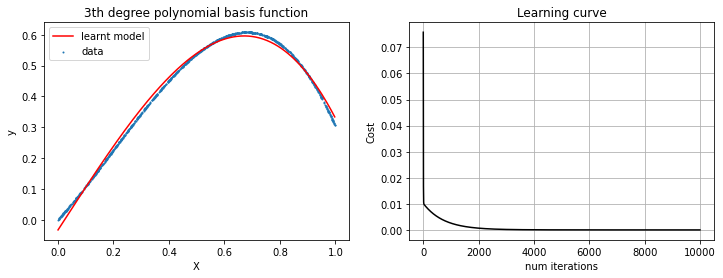

In [325]:
n_degree = 3

########## beginning of your code #################
new_X = basis_function(X, 3)
theta, J_history = linear_regression(new_X,y, 10000, .1)

######### end of your code ########################

plot_model(X, y, theta, J_history, n_degree)

## Question 2: Regularization

In this question, we re-use the data from question 1, but with less data points, with additional noise, so that it's easy to overfit to the data and noise. 

The TA used a 10-degree polynomial basis function to transform X, and then fit a linear regression to it. This resulted in overfitting to the data and the noise. You can see the result of the 10-degree polynomial fitting in the cell below. It's clear that the result is overfitted. You are given the theta of this overfitted model, `theta_overfit`. 

You are expected to complete these tasks: 

1. Add a regularization term to the `computeCost` function so that it prevents overfitting, the new function is called `computeRegularizedCost`. 

2. Edit the `gradientDescent` function to add the gradient of the regualarization term and to call the `computeRegularizedCost` function instead of the old `computeCost` function. The new function is called `gradientDescentWithRegularization`. 

3. Use the `gradientDescentWithRegularization` function to update the initial `theta_overfit` given to you, to see the effect of adding regularization to a overfitted function. 

Note that, in step 3, the theta was not randomly initilaized, it rather initializes with the overfitted parameter. The exercise is to use that as a starting point, to update the theta to less overfitted parameter with regularization. 

Text(0, 0.5, 'y')

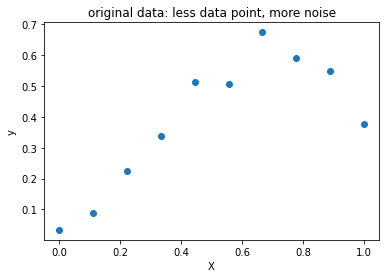

In [326]:
# Here is the data

np.random.seed(1) # DON"T change this random seed, this make sure the data is consistent with theta. 

m = 10 # number of samples
X = np.linspace(0, 1, m)
y = X + X**2 - 1.6*X**3 + (np.random.normal(size=m)-0.5)*0.03

plt.scatter(X, y)
plt.title("original data: less data point, more noise")
plt.xlabel("X")
plt.ylabel("y")

In [327]:
# Here is the helper plotting function for q2:
def plot_model_q2(X, y, theta, n_degree):
    plt.scatter(X, y, label="original data", s=15)
    plt.xlabel("X")
    plt.ylabel("y")
    
    xx = np.linspace(0, 1, 1000)    
    y_pred = np.array([xx**i for i in range(n_degree+1)]).T @ theta
    plt.plot(xx, y_pred, label="learnt model", c="red")
    plt.title("{}th degree polynomial basis function".format(n_degree))
    plt.legend()

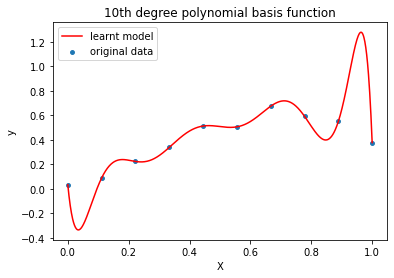

In [328]:
# Here is the learnt model with 10-degree polynomial

n_degree = 10
# DON"T change the theta_overfit
theta_overfit = np.array([
        3.37303609e-02, -2.56646249e+01,  5.78787304e+02, -4.87875178e+03,
        2.06599400e+04, -4.65643168e+04,  4.99439883e+04, -2.96411573e+03,
       -4.86773062e+04,  4.51493937e+04, -1.32216104e+04])
#[150.22295201328842, 185.20305317857492, 766.95130263894, -3101.237646468351, 6857.725819914841, -8112.550910490804, 
#8426.125973658347, -2081.8926757560353, -8175.447475495858, 8284.01532816585, -5548.000415316635]
plot_model_q2(X, y, theta_overfit, n_degree)

### Q2.1. Edit `computeCost`, `gradientDescent` and `linear_regression` function to add regularization. 

For `computeReguarlizedCost`, You can refer to lecture6 slide 27 for the regularized cost function equation. 

In the `gradientDescentWithRegularization` it needs compute the gradient of the regularization term, and to call the new cost function. 

In the `regularized_linear_regression`, we pass `theta_overfit` as a parameter, so that the model initialize theta with `theta_overfit` instead of 0.

> Hint: you only need to edit 1-2 line in each function

> Hint2: play around with different parameters: alpha, iterations, lambdah to see the effect of different values. 

In [329]:
def computeRegularizedCost(X, y, theta, lambdah):
    """
    Compute cost for linear regression.
    @param X : The input dataset, shape (m, n+1)
    @param y : The function value (label), shape (m, )
    @param theta : The parameters for the regression function. shape (n+1, ).
    @param lambdah: the regularization hyperparmater. Higher number leads to more regularization. 
    
    @return J : The cost.
    """
    ########## Begin Your Code ###############
    m = y.size
    #theta = theta.to_numpy()
    reg_theta = theta[1:]
    #print("REG THETA: ", reg_theta, " THETA ** 2: ", (reg_theta @ reg_theta))
    J = (np.sum((X @ theta - y)**2))/2/m + (lambdah * (reg_theta @ reg_theta))
    J = (np.sum((X @ theta - y)**2))/2/m

    #print("TOTAL COST IS: ", J)
    ########## End your Code #################
    
    return J


def gradientDescentWithRegularization(X, y, theta, alpha, num_iters, lambdah):
    """
    Performs gradient descent to learn `theta`
    
    @param X : The input dataset, shape (m, n+1)
    @param y : The function value (label), shape (m, )
    @param theta : The parameters for the regression function. shape (n+1, ).
    @param alpha: Learning rate. 
    @param num_iters: The number of iterations for gradient descent.
    @param lambdah: the regularization hyperparmater. Higher number leads to more regularization. 
    
    @return theta: The learned linear regression parameters. A vector of shape (n+1, ).
    @return J_history: A python list for the values of the cost function after each iteration.
    """
    ########## Begin Your Code ###############
    m = y.shape[0] 
    theta = theta.copy()
    #theta = theta.to_numpy()
    J_history = []
    for i in range(num_iters):
        theta_tmp = []    
        for j in range(len(theta)): # partial derivative 
            gradient = (alpha/m) * np.sum(((X @ theta) - y) * X[:,j])
            new_theta = theta[j] - gradient
            if j != 0:
                if new_theta > 0:
                    new_theta -= (lambdah * theta[j] * theta[j])
                    #new_theta -= (lambdah * theta[j])
                elif new_theta < 0: 
                    new_theta += (lambdah * theta[j] * theta[j])
                    #new_theta += (lambdah * theta[j])
            theta_tmp.append(new_theta)     
        #print("NEW THETA: ")
        #print(theta_tmp)
        theta = theta_tmp
        theta = np.array(theta)
        J_history.append(computeRegularizedCost(X, y, theta, lambdah))
    ########## End your Code #################
    #print("RETURN THETA: ", theta)
    return theta, J_history


def regularized_linear_regression(X, y, theta_overfit, iterations=1000, alpha=0.001, lambdah=0.001):
    """
    @params X: the input data X, of shape (m, n), where m is the number of samples, and n is the number of features
    @params y: the data label y, of shape (m, ). 
    @params theta_overfit: the initial point of the learning is where model is already overfit to data
    
    @params iterations: number of iterations in gradient descent
    @params alpha: learning rate of gradient descent
    @param lambdah: the regularization hyperparmater. Higher number leads to more regularization. 
    
    @return theta: updated paramter theta
    @return J_history: history of cost through out each iteration. 
    """ 
    ##### beginning of your code #######
    theta = theta_overfit.copy()
    theta, J_history = gradientDescentWithRegularization(X, y, theta, alpha, iterations, lambdah)
    ####### end of your code ########
    return theta, J_history


### Q2.2. Call `regularized_linear_regression` to update the `theta_overfit` to a `theta` that's not overfit, and plot the result. 
We keep the polynomial to 10 degree yet learns a simplier function. 
Suggested Steps:

1. transform data with 10 degree polynomial basis fucntion. 
2. call `regularized_linear_regression` with X, y, `theta_overfit`, in order to get the new_theta and J_hisotry


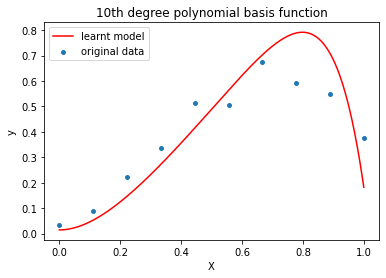

In [330]:
n_degree = 10

#### beginning  #### 
new_X = basis_function(X, n_degree)
#print(X)
new_theta, J_history = regularized_linear_regression(new_X,y, theta_overfit, 10000, .01, .00002)
#new_theta, J_history = regularized_linear_regression(new_X,y, theta_overfit)


#new_theta, J_history = regularized_linear_regression(new_X,y, theta_overfit, 10000, .1, .00004)

#print("OLD THETA: ", theta_overfit)
#print("NEW THETA: ", new_theta)
######### end ########################
plot_model_q2(X, y, new_theta, n_degree)

## Question 3: Linear Classification

Implement linear classification algorithm (perceptron) descrbied in lecture 7, using the following sample data. 

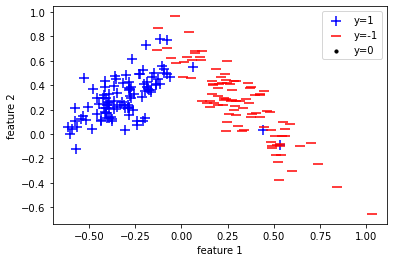

In [331]:
# Here is the data and plot helper function
from sklearn.datasets import make_classification

X, y = make_classification( n_features=2, n_classes=2, n_samples=200, 
                           n_redundant=0, n_clusters_per_class=1, scale=0.3,
                           random_state=140) # keep the random_state unchanged for consistency
y[y==0] = -1

def plot_data(X, y):
    plt.scatter(X[y==1,0], X[y==1,1], c="blue", marker="+", s=100, label="y=1")
    plt.scatter(X[y==-1,0], X[y==-1,1], c="red", marker="_", s=100, label="y=-1")
    plt.scatter(X[y==0, 0], X[y==0, 1], c = "black", s = 10, label="y=0")
    plt.legend()
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")    
    plt.show()
    
plot_data(X, y)

In [332]:
# Finish writing the LinearClassifier Class

class LinearClassifier(object):
    
    def predict(self, X, theta):
        """ 
        use X and feature vector theta to make classification. return predicted classification y_pred. 
        
        @param X: input data X of dimension (m, n) where m is the samples and n is the features
        @param theta: weight vector for features, shape (n, )
        @return y_pred: classification for each sample, shape is (m, ). y_pred should be a vector of 0, -1, or 1. 
        """
        ########### your code here   ########## 
        #dot product of x and theta to get activation
        y_pred = np.dot(X, theta)
        for x in range(y_pred.size):
            if y_pred[x] > 0:
                y_pred[x] = 1
            elif y_pred[x] < 0:
                y_pred[x] = -1
        ###########  end of your code ############
        return y_pred
    
    
    def update(self, X, y, iterations=10):
        """         
        @param X: input data X of dimension (m, n) where m is the samples and n is the features
        @param y: input data y of dimension (m,)
        @iterations: number of iterations to update the algorithm
        @return theta: the feature vector learnt from the data, shape (n, )
        """
        m, n = X.shape
        #print(X)
        theta = np.zeros(n)
        for n_iter in range(iterations):
            print("iteration", n_iter)
        
        ########### your code here   ############ 
            y_pred = self.predict(X, theta)
            for x in range(y_pred.size):
                if y_pred[x] != y[x]:
                    theta +=  np.dot(y[x],X[x])
        ###########  end of your code ############
        
            plot_data(X, y_pred)
            print("accuracy score:", self.accuracy(y_pred, y))
        return theta
        

    def accuracy(self, y_pred, y):
        """ 
        This function compares y_pred and y and calculate the accuracy of the prediction. 
        """
        return np.mean(y_pred == y)  

iteration 0


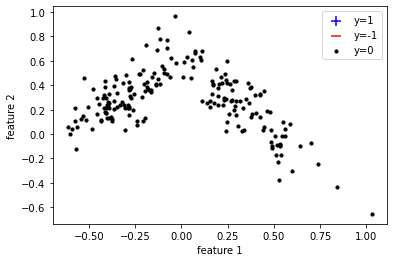

accuracy score: 0.0
iteration 1


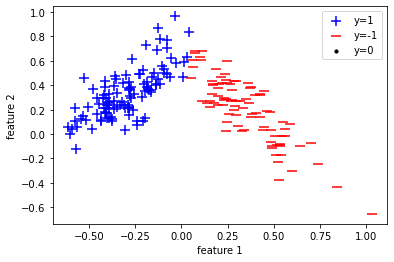

accuracy score: 0.935
iteration 2


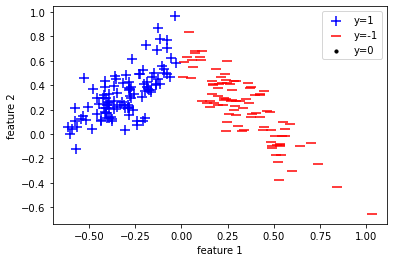

accuracy score: 0.955
iteration 3


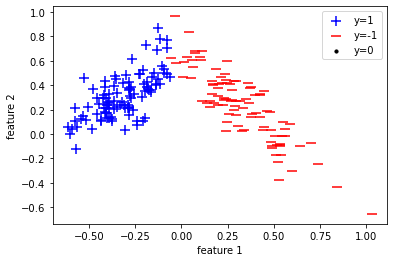

accuracy score: 0.97
iteration 4


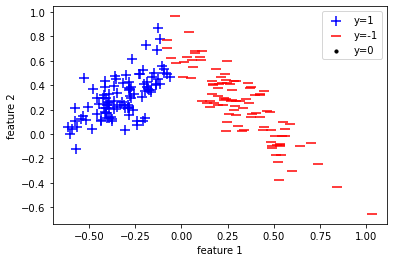

accuracy score: 0.97


In [333]:
### here we run your code 
### This should update the theta, plot out the prediction at each iteration, and print the accuracy score

model = LinearClassifier()
theta = model.update(X, y, iterations=5)

## Question 4: Logistic Regression
Using the same data as Q3, here you will implement this as a `LogisticRegression` class. You will implement these three functions:

1. `sigmoid`: given $ z = \theta^TX$ , calculate prediction y_pred

$$
y_{pred} = -\frac{1}{1+e^{-z}}
$$

2. `computeCost`: Use log loss as cost function, minimize log loss is the same as maximizing log likelihood

$$
J = -\frac{1}{m} \sum_i^{m} y_i\log{y_{pred}} + (1-y_i)\log{(1-y_{pred})}
$$


3. `gradientDecent`: edit `gradientDescent` function from earlier. The only change is the gradient for log loss:

$$
\frac{\partial J}{\partial \theta_j} = (y_{pred} - y)X_j
$$


    

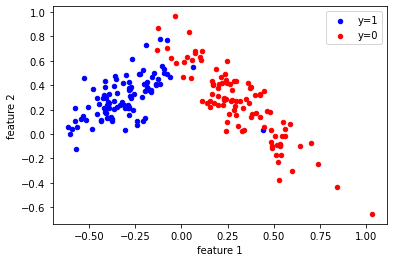

In [334]:
# data
X, y = make_classification( n_features=2, n_classes=2, n_samples=200, 
                           n_redundant=0, n_clusters_per_class=1, scale=0.3,
                           random_state=140) # keep the random_state unchanged for consistency

X = np.append(X, np.ones((200,1)), axis=1) # here we add a bias term to X

def plot_data_q4(X, y):
    plt.scatter(X[y>=0.5,0], X[y>=0.5,1], c="blue", s=20, label="y=1")
    plt.scatter(X[y<0.5,0], X[y<0.5,1], c="red", s=20, label="y=0")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.legend()
    plt.show()
    
    
plot_data_q4(X, y)

In [335]:
class LogisticRegression(object):    
    
    def sigmoid(self, z):
        """
        Compute sigmoid function. 
        
        @param z : The linear input, which is the  matrix multiplication product of X and theta
        @return: The sigmoid function over z.
        """
        ########## Begin Your Code ###############
        y_pred = 1/(1+np.exp(-z))
        return y_pred
        ########## End of your Code #################   
    
    
    def computeCost(self, X, y, theta):
        """
        Compute cost for logistic regression with log loss as cost function. 
        
        @param X : The input dataset, shape (200, 3)
        @param y : The prediction, shape (3, )
        @param theta : The parameters shape (3, )
        @return J : The cost.
        """
        
        ########## Begin Your Code ###############
        m = y.shape[0]
        #theta_T = np.transpose(theta)

        J = 0
        #for i in range(m):
       # z = np.dot(theta, X)
        sig = self.sigmoid(X@theta)
        ones = np.ones(m)
        J = np.sum(y* np.log(sig) + (ones-y)* np.log(ones-sig))
        J *= -1/m
        print("COST: ", J)
        ########## End of your Code #################   
        return J    

    def gradientDescent(self, X, y, alpha, num_iters):
        """
        Performs gradient descent to learn parameters for logistic regression

        @param X : The input dataset, shape (m, n+1)
        @param y : The function value (label), shape (m, )
        @param alpha: Learning rate. 
        @param num_iters: The number of iterations for gradient descent.

        @return theta: The learned linear regression parameters. A vector of shape (n+1, ).
        @return J_history: A python list for the values of the cost function after each iteration.
        """
        ########## Begin Your Code ###############
        
        m = y.shape[0] 
        theta = np.zeros(X.shape[1])
        J_history = []
        for i in range(num_iters):
            theta_tmp = []    
            sig = self.sigmoid(X@theta)
            for j in range(len(theta)): # partial derivative
                gradient = (alpha/m)*np.sum((sig - y) * X[:,j])
                new_theta = theta[j] - gradient
                theta_tmp.append(new_theta)        
            theta = theta_tmp
            #print("END THETA: ", theta)
            J_history.append(self.computeCost(X, y, theta))
        return theta, J_history
        ########## End your Code #################


COST:  0.6699589780196632
COST:  0.648369832180845
COST:  0.6282306677871338
COST:  0.6094168561784846
COST:  0.5918196624732821
COST:  0.5753417221805086
COST:  0.5598946242028005
COST:  0.5453975574077158
COST:  0.5317764744432967
COST:  0.5189634974030694
COST:  0.5068964330940531
COST:  0.49551833865908107
COST:  0.48477711391464007
COST:  0.4746251130633057
COST:  0.4650187751286139
COST:  0.45591827460618817
COST:  0.4472871939921299
COST:  0.43909221928458836
COST:  0.4313028588280754
COST:  0.42389118521800273
COST:  0.41683159948111753
COST:  0.4101006164014102
COST:  0.40367666964870197
COST:  0.3975399352593864
COST:  0.39167217198798226
COST:  0.38605657707102903
COST:  0.38067765600321
COST:  0.37552110500578634
COST:  0.3705737049595632
COST:  0.3658232256717206
COST:  0.36125833944319413
COST:  0.3568685429977371
COST:  0.352644086923432
COST:  0.3485759118611077
COST:  0.34465559075136126
COST:  0.34087527652252275
COST:  0.3372276546660901
COST:  0.3337059002041604
COS

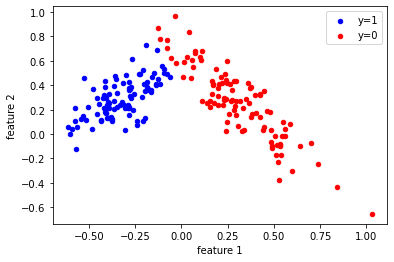

accuracy 0.97


In [336]:
# Here we run your code and plot the result.  

lr = LogisticRegression()
theta, J_history = lr.gradientDescent(X, y, alpha=1, num_iters=1000)
y_pred = lr.sigmoid(X @ theta).round()
plot_data_q4(X, y_pred)
print("accuracy", np.mean(y_pred == y))